In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from IPython.display import Image
pd.set_option('chained_assignment', None)
plt.style.use('ggplot')
plt.rc('xtick.major', size=0)
plt.rc('ytick.major', size=0)

In [3]:
user_tags = pd.read_csv("user_tags_merge.csv")

In [4]:
user_tags

,user_id,user_name,gender_male,airport,animal,apple,auto,autograph,autumn,baby,...,tree,vatican,vegetable,violin,volleyball,water,waterfall,wedding,wine,winter
0,963865524,e34_1023,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,231764687,kojita_na,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,35262468,kanacom02,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.689974,0.000000,...,0.622459,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12889622,sato_charlotte,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.890903,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1338792479,nkmrerk,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.975755,0.000000,...,0.475021,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,632296001,yukamoumoon,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.549834,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,204010752,keeeei_t,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.890903
7,1441642315,yukako0924,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,472108366,keikinoshi,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1457971013,mymt_yk,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.425557,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.908877,0.000000,0.000000


In [5]:
X = user_tags[['person', 'food']]
X.tail()

,person,food
55,5.406591,5.783906
56,0.999590,8.565152
57,2.848325,5.342605
58,8.415150,1.440234
59,0.000000,0.000000


In [6]:
y = user_tags['gender_male']

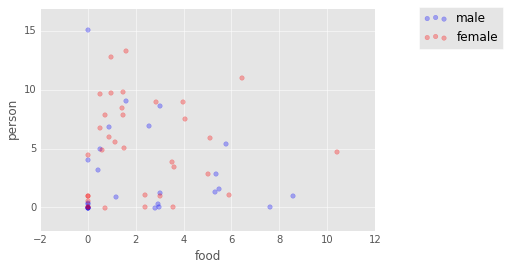

In [7]:
np.random.seed = 0

xmin, xmax = -2, 12
ymin, ymax = -2, 17

index_male = y[y==1].index
index_female = y[y==0].index

fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(X.loc[index_male, 'food'],
                X.loc[index_male, 'person']+(np.random.rand(len(index_male))-0.5)*0.1,
                color='b', label='male', alpha=0.3)
sc = ax.scatter(X.loc[index_female, 'food'],
                X.loc[index_female, 'person']+(np.random.rand(len(index_female))-0.5)*0.1,
                color='r', label='female', alpha=0.3)
ax.set_xlabel('food')
ax.set_ylabel('person')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))
plt.show()

In [8]:
X = user_tags[['nail', 'person', 'sport', 'food','coffee','cake','beer','sky']]
y = user_tags["gender_male"]

In [10]:
def cross_val(clf, X, y, K, random_state=0):
    cv = KFold(len(y), K, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv)
    return scores

In [12]:
clf = LogisticRegression()
for i in range(2,12):
    scores = cross_val(clf, X, y, i)
    print(i)
    print('Scores:', scores)
    print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

2
Scores: [ 0.56666667  0.46666667]
Mean Score: 0.517 (+/-0.100)
3
Scores: [ 0.45  0.55  0.65]
Mean Score: 0.550 (+/-0.163)
4
Scores: [ 0.46666667  0.53333333  0.26666667  0.8       ]
Mean Score: 0.517 (+/-0.382)
5
Scores: [ 0.33333333  0.58333333  0.5         0.33333333  0.83333333]
Mean Score: 0.517 (+/-0.371)
6
Scores: [ 0.3  0.6  0.6  0.2  0.7  0.9]
Mean Score: 0.550 (+/-0.473)
7
Scores: [ 0.33333333  0.66666667  0.44444444  0.66666667  0.125       0.75        0.875     ]
Mean Score: 0.552 (+/-0.485)
8
Scores: [ 0.375       0.5         0.5         0.5         0.28571429  0.42857143
  0.71428571  0.85714286]
Mean Score: 0.520 (+/-0.344)
9
Scores: [ 0.28571429  0.57142857  0.42857143  0.71428571  0.57142857  0.
  0.66666667  1.          0.83333333]
Mean Score: 0.563 (+/-0.562)
10
Scores: [ 0.16666667  0.5         0.83333333  0.33333333  0.5         0.66666667
  0.          0.66666667  1.          0.83333333]
Mean Score: 0.550 (+/-0.597)
11
Scores: [ 0.16666667  0.5         0.83333333

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
for i in range(2,12):
    scores = cross_val(clf, X, y, i)
    print(i)
    print('Scores:', scores)
    print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

2
Scores: [ 0.4  0.5]
Mean Score: 0.450 (+/-0.100)
3
Scores: [ 0.5   0.45  0.6 ]
Mean Score: 0.517 (+/-0.125)
4
Scores: [ 0.46666667  0.53333333  0.2         0.66666667]
Mean Score: 0.467 (+/-0.340)
5
Scores: [ 0.33333333  0.5         0.58333333  0.25        0.66666667]
Mean Score: 0.467 (+/-0.309)
6
Scores: [ 0.3  0.7  0.6  0.3  0.6  0.6]
Mean Score: 0.517 (+/-0.314)
7
Scores: [ 0.33333333  0.44444444  0.44444444  0.33333333  0.25        0.75        0.625     ]
Mean Score: 0.454 (+/-0.328)
8
Scores: [ 0.375       0.5         0.5         0.5         0.28571429  0.28571429
  0.71428571  0.57142857]
Mean Score: 0.467 (+/-0.273)
9
Scores: [ 0.28571429  0.57142857  0.42857143  0.57142857  0.57142857  0.42857143
  0.5         0.83333333  0.5       ]
Mean Score: 0.521 (+/-0.282)
10
Scores: [ 0.16666667  0.5         0.5         0.33333333  0.5         0.5         0.5
  0.5         0.83333333  0.5       ]
Mean Score: 0.483 (+/-0.314)
11
Scores: [ 0.16666667  0.5         0.5         0.33333333 

In [14]:
X = user_tags[['nail','hair', 'person', 'sport', 'food','night','coffee','wedding','cake','beer', 'dog', 'animal', 'tree','blossom','cat', 'flower','sky','nature','cherry']]
y = user_tags["gender_male"]

In [15]:
X['animal']=X['animal']+X['dog']+X['cat']
X['cosme']=X['hair']+X['nail']
X['nature']=X['nature']+X['sky']+X['flower']+X['tree']+X['blossom']+X['cherry']
X = X.drop(['nail','hair', 'dog', 'cat', 'sky','flower','tree','blossom','cherry'],axis=1)

In [16]:
clf = LogisticRegression()
for i in range(2,12):
    scores = cross_val(clf, X, y, i)
    print(i)
    print('Scores:', scores)
    print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

2
Scores: [ 0.6  0.5]
Mean Score: 0.550 (+/-0.100)
3
Scores: [ 0.6   0.65  0.75]
Mean Score: 0.667 (+/-0.125)
4
Scores: [ 0.66666667  0.6         0.33333333  0.8       ]
Mean Score: 0.600 (+/-0.340)
5
Scores: [ 0.58333333  0.58333333  0.58333333  0.41666667  0.83333333]
Mean Score: 0.600 (+/-0.267)
6
Scores: [ 0.5  0.5  0.6  0.2  0.8  0.8]
Mean Score: 0.567 (+/-0.411)
7
Scores: [ 0.55555556  0.66666667  0.33333333  0.66666667  0.875       0.75        0.75      ]
Mean Score: 0.657 (+/-0.321)
8
Scores: [ 0.625       0.625       0.5         0.625       0.57142857  0.85714286
  0.71428571  0.71428571]
Mean Score: 0.654 (+/-0.202)
9
Scores: [ 0.57142857  0.71428571  0.42857143  0.57142857  0.57142857  0.71428571
  0.66666667  1.          0.66666667]
Mean Score: 0.656 (+/-0.297)
10
Scores: [ 0.5         0.66666667  0.83333333  0.33333333  0.66666667  0.33333333
  0.83333333  0.66666667  1.          0.66666667]
Mean Score: 0.650 (+/-0.407)
11
Scores: [ 0.5         0.66666667  0.83333333  0.33

In [17]:
from sklearn.externals import joblib
clf = LogisticRegression()
clf.fit(X,y)
joblib.dump(clf, 'clf.pkl') 

['clf.pkl', 'clf.pkl_01.npy', 'clf.pkl_02.npy', 'clf.pkl_03.npy']